In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

In [35]:
syd = pd.read_csv('sydney_completion_50_30.csv')
syd.head()

,Number_of_Liks,Number_of_Comments,urls,picName,captions,tags,captions_art,captions_australia,captions_berlin,captions_brands,...,images_street,images_table,images_water,images_wearing,images_white,images_woman,images_young,confidence0,landmark,event
0,175,4,['https://instagram.fsyd3-1.fna.fbcdn.net/vp/e...,52350465_2274134982863729_1711150537197649163_...,explore â operahouse exploresydney sydney visi...,operahouse visitsydney exploresydney travelsyd...,0,0,0,0,...,0,0,1,1,1,1,1,0.916932,0,1
1,279,15,['https://instagram.fsyd3-1.fna.fbcdn.net/vp/d...,52401403_408463856388712_4135711399233176375_n...,spf seasalt effortlessly hours â hit amazing l...,nature grateful sydney views happyplace love b...,0,1,0,0,...,0,0,1,0,0,1,1,0.963524,0,1
2,1449,50,['https://instagram.fsyd3-1.fna.fbcdn.net/vp/f...,52678122_1183948995112245_1003031007421989373_...,currently absent anyone girlsgoneloavies fanta...,ootdinspo mardigras sydneyoperahouse sydneyhar...,0,0,0,0,...,0,1,0,0,0,1,1,0.724440,0,1
3,971,34,['https://instagram.fsyd3-1.fna.fbcdn.net/vp/a...,52630404_623675894750222_1393973815424104037_n...,girlsthatwander â sky damtraveller travellife ...,nature travelphotography damtraveller passionp...,0,1,0,0,...,0,0,1,0,0,1,0,0.925264,0,0
4,1522,52,['https://instagram.fsyd3-1.fna.fbcdn.net/vp/9...,52551506_387978651979693_2593853846405545923_n...,yangshuo birthday å â sunny ã,NaN,0,0,0,0,...,0,1,1,0,1,0,0,0.688944,0,1


In [36]:
syd.columns

Index(['Number_of_Liks', 'Number_of_Comments', 'urls', 'picName', 'captions',
       'tags', 'captions_art', 'captions_australia', 'captions_berlin',
       'captions_brands',
       ...
       'images_street', 'images_table', 'images_water', 'images_wearing',
       'images_white', 'images_woman', 'images_young', 'confidence0',
       'landmark', 'event'],
      dtype='object', length=126)

In [61]:
#get rid of unnecessary 
def drop_col(df):
  return df.drop(columns=['urls','picName','captions',
                          'tags','images_tags_cleaned','confidence0',
                          'shortcode','followers'])
syd_drop = drop_col(syd.copy())
syd_drop.columns

Index(['Number_of_Liks', 'Number_of_Comments', 'captions_art',
       'captions_australia', 'captions_berlin', 'captions_brands',
       'captions_cars', 'captions_dubai', 'captions_fashion',
       'captions_followforfollowback',
       ...
       'images_standing', 'images_street', 'images_table', 'images_water',
       'images_wearing', 'images_white', 'images_woman', 'images_young',
       'landmark', 'event'],
      dtype='object', length=118)

In [62]:
syd_drop.isnull().sum()

Number_of_Liks                  0
Number_of_Comments              0
captions_art                    0
captions_australia              0
captions_berlin                 0
captions_brands                 0
captions_cars                   0
captions_dubai                  0
captions_fashion                0
captions_followforfollowback    0
captions_followme               0
captions_life                   0
captions_like                   0
captions_likeforfollow          0
captions_likeforlikes           0
captions_london                 0
captions_losangeles             0
captions_love                   0
captions_luxury                 0
captions_melbourne              0
captions_miami                  0
captions_mountains              0
captions_nature                 0
captions_newyork                0
captions_nã                     0
captions_paris                  0
captions_photography            0
captions_sea                    0
captions_sport                  0
captions_sydne

In [0]:
def filter_likes_3000(df):
  return df[df['Number_of_Liks'] <= 3000]
syd_3000 = filter_likes_3000(syd_drop.copy())

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Finding Outliers')

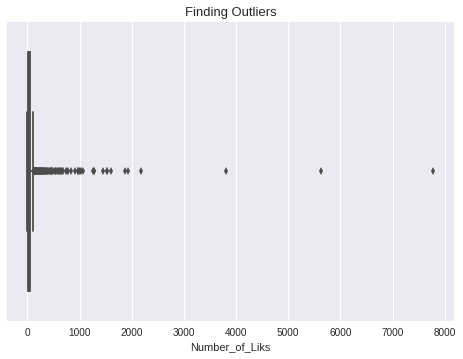

In [64]:
sns.boxplot(x='Number_of_Liks',data=syd_drop)
plt.title('Finding Outliers',fontsize=13)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'After Removing Outliers')

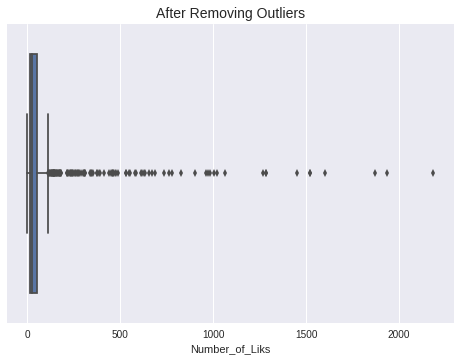

In [65]:
sns.boxplot(x='Number_of_Liks',data=syd_3000)
plt.title('After Removing Outliers',fontsize=14)

In [66]:
syd_dum = pd.get_dummies(syd_3000)
syd_dum.columns

Index(['Number_of_Liks', 'Number_of_Comments', 'captions_art',
       'captions_australia', 'captions_berlin', 'captions_brands',
       'captions_cars', 'captions_dubai', 'captions_fashion',
       'captions_followforfollowback',
       ...
       'back_ground_Green', 'back_ground_Grey', 'back_ground_None',
       'back_ground_Orange', 'back_ground_Pink', 'back_ground_Purple',
       'back_ground_Red', 'back_ground_Teal', 'back_ground_White',
       'back_ground_Yellow'],
      dtype='object', length=141)

In [67]:
#remove white from this as white is considered as mircosoft api when they dont
#know what to put the color as so remove it
syd_dum.drop(columns=['back_ground_White'])
syd_dum.columns

Index(['Number_of_Liks', 'Number_of_Comments', 'captions_art',
       'captions_australia', 'captions_berlin', 'captions_brands',
       'captions_cars', 'captions_dubai', 'captions_fashion',
       'captions_followforfollowback',
       ...
       'back_ground_Green', 'back_ground_Grey', 'back_ground_None',
       'back_ground_Orange', 'back_ground_Pink', 'back_ground_Purple',
       'back_ground_Red', 'back_ground_Teal', 'back_ground_White',
       'back_ground_Yellow'],
      dtype='object', length=141)

In [68]:
#number of likes of Y variable is likes
y = syd_dum.pop("Number_of_Liks")

# Results from the Linear Regression model

X = sm.add_constant(syd_dum.astype(float))
model = sm.OLS(y.astype(float), X).fit()
# est2 = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Number_of_Liks   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     7.747
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           5.49e-66
Time:                        12:46:00   Log-Likelihood:                -4638.7
No. Observations:                 722   AIC:                             9511.
Df Residuals:                     605   BIC:                         1.005e+04
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [69]:
#from assg1_helpers import variance_inflation_factor, face_json_to_df, MSFaceAPIClient
from week2_helpers import variance_inflation_factor

vif = variance_inflation_factor(X)
df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues, "vif": vif["vif"]})
df_coeffs = df_coeffs.drop("const", axis=0)
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

,Coefficients,p,vif
Number_of_Comments,13.7182,2.64402e-81,5.6599e-16
images_white,-54.0257,0.000404958,8.81137e-17
captions_travel,147.484,0.00274574,6.42805e-16
tags_nature,212.54,0.00726624,1.37392e-15
images_young,-70.9076,0.0127946,1.66281e-16
images_city,-59.1999,0.0169127,4.58095e-16
back_ground_Yellow,148.039,0.0188715,8.74945e-15
tags_sydney,-55.2705,0.0220477,4.00887e-17
tags_brasil,176.154,0.0254764,3.14584e-15
tags_travel,-122.412,0.0264398,1.1701e-15


In [70]:
df_vif = X.loc[:, vif["vif"] <= 5]

# Complete this
x_vif = sm.add_constant(df_vif.astype(float))
model_vif = sm.OLS(y, x_vif).fit()

print(model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:         Number_of_Liks   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     7.747
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           5.49e-66
Time:                        12:46:02   Log-Likelihood:                -4638.7
No. Observations:                 722   AIC:                             9511.
Df Residuals:                     605   BIC:                         1.005e+04
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [71]:
vif = variance_inflation_factor(df_vif.astype(float))

df_coeffs = pd.DataFrame({"Coefficients": model_vif.params, "p": model_vif.pvalues, "vif": vif["vif"]})
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

,Coefficients,p,vif
Number_of_Comments,13.7182,2.64402e-81,1.48153
images_white,-54.0257,0.000404958,1.54869
captions_travel,147.484,0.00274574,6.42812e-16
tags_nature,212.54,0.00726624,17.7368
images_young,-70.9076,0.0127946,5.07041
images_city,-59.1999,0.0169127,2.43369
back_ground_Yellow,148.039,0.0188715,4.03757e+09
tags_sydney,-55.2705,0.0220477,4.00892e-17
tags_brasil,176.154,0.0254764,3.14589e-15
tags_travel,-122.412,0.0264398,1.17011e-15
